# Importing all the necessary libraries

In [1]:
import pandas as pd
from sklearn.model_selection import train_test_split,GridSearchCV
from sklearn.preprocessing import MinMaxScaler,LabelEncoder,StandardScaler,Normalizer,OneHotEncoder
from sklearn.feature_extraction.text import CountVectorizer
from scipy.sparse import hstack
from sklearn.metrics import f1_score,accuracy_score,roc_auc_score,precision_recall_fscore_support,classification_report
from sklearn.linear_model import LogisticRegression
from sklearn.naive_bayes import MultinomialNB
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier,GradientBoostingClassifier
import seaborn as sns
from sklearn.metrics import roc_curve,auc
import itertools
import numpy as np
from sklearn import metrics
import matplotlib.pyplot as plt
from sklearn.metrics import confusion_matrix

In [2]:
data=pd.read_csv('preprocessed_data9099.csv')

In [3]:
data.columns

Index(['payment_sequential', 'payment_type', 'payment_installments',
       'payment_value', 'customer_city', 'customer_state', 'price',
       'freight_value', 'product_name_length', 'product_description_length',
       'product_photos_qty', 'seller_state', 'product_category_name',
       'delivery_days', 'estimated_days', 'ships_in', 'arrival_time',
       'delivery_impression', 'estimated_del_impression', 'ship_impression',
       'seller_popularity', 'existing_cust', 'Score'],
      dtype='object')

In [4]:
data['Score'].shape

(105208,)

In [6]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 105208 entries, 0 to 105207
Data columns (total 23 columns):
 #   Column                      Non-Null Count   Dtype  
---  ------                      --------------   -----  
 0   payment_sequential          105208 non-null  int64  
 1   payment_type                105208 non-null  object 
 2   payment_installments        105208 non-null  int64  
 3   payment_value               105208 non-null  float64
 4   customer_city               105208 non-null  object 
 5   customer_state              105208 non-null  object 
 6   price                       105208 non-null  float64
 7   freight_value               105208 non-null  float64
 8   product_name_length         105208 non-null  int64  
 9   product_description_length  105208 non-null  int64  
 10  product_photos_qty          105208 non-null  int64  
 11  seller_state                105208 non-null  object 
 12  product_category_name       105208 non-null  object 
 13  delivery_days 

# Splitting the dataset

In [7]:
X = data.drop('Score',axis=1)
Y = data.Score.values
X_train,X_test,y_train,y_test = train_test_split(X,Y,test_size=.33,stratify=Y,random_state=42)
print(X_train.shape,X_test.shape,y_train.shape,y_test.shape)

(70489, 22) (34719, 22) (70489,) (34719,)


# Normalising all the numerical features

In [8]:
std_scaler = Normalizer()
min_max = MinMaxScaler()
#payment_sequential feature
payment_sequential_train = std_scaler.fit_transform(X_train.payment_sequential.values.reshape(-1,1))
payment_sequential_test = std_scaler.transform(X_test.payment_sequential.values.reshape(-1,1))
#payment_installments feature
payment_installments_train = std_scaler.fit_transform(X_train.payment_installments.values.reshape(-1,1))
payment_installments_test = std_scaler.transform(X_test.payment_installments.values.reshape(-1,1))

#Payment value feature
payment_value_train = std_scaler.fit_transform(X_train.payment_value.values.reshape(-1,1))
payment_value_test = std_scaler.transform(X_test.payment_value.values.reshape(-1,1))


#price
price_train = std_scaler.fit_transform(X_train.price.values.reshape(-1,1))
price_test = std_scaler.transform(X_test.price.values.reshape(-1,1))

#freight_value
freight_value_train = std_scaler.fit_transform(X_train.freight_value.values.reshape(-1,1))
freight_value_test = std_scaler.transform(X_test.freight_value.values.reshape(-1,1))

#product_name_length
product_name_length_train = std_scaler.fit_transform(X_train.product_name_length.values.reshape(-1,1))
product_name_length_test = std_scaler.transform(X_test.product_name_length.values.reshape(-1,1))


#product_description_length
product_description_length_train = std_scaler.fit_transform(X_train.product_description_length.values.reshape(-1,1))
product_description_length_test = std_scaler.transform(X_test.product_description_length.values.reshape(-1,1))


#product_photos_qty
product_photos_qty_train = std_scaler.fit_transform(X_train.product_photos_qty.values.reshape(-1,1))
product_photos_qty_test = std_scaler.transform(X_test.product_photos_qty.values.reshape(-1,1))


#delivery_days
delivery_days_train = std_scaler.fit_transform(X_train.delivery_days.values.reshape(-1,1))
delivery_days_test = std_scaler.transform(X_test.delivery_days.values.reshape(-1,1))


#estimated_days
estimated_days_train = std_scaler.fit_transform(X_train.estimated_days.values.reshape(-1,1))
estimated_days_test = std_scaler.transform(X_test.estimated_days.values.reshape(-1,1))


#ships_in
ships_in_train = std_scaler.fit_transform(X_train.ships_in.values.reshape(-1,1))
ships_in_test = std_scaler.transform(X_test.ships_in.values.reshape(-1,1))

#seller_popularity
seller_popularity_train = min_max.fit_transform(X_train.seller_popularity.values.reshape(-1,1))
seller_popularity_test = min_max.transform(X_test.seller_popularity.values.reshape(-1,1))

# NORMALIZING CATEGORICAL FEATURES

In [10]:
#initialising oneHotEncoder and CountVetors
onehot = CountVectorizer()
cat = OneHotEncoder()
#payment_type
payment_type_train = onehot.fit_transform(X_train.payment_type.values)
payment_type_test = onehot.transform(X_test.payment_type.values)


#customer_state
customer_state_train = onehot.fit_transform(X_train.customer_state.values)
customer_state_test = onehot.transform(X_test.customer_state.values)

#seller_state
seller_state_train = onehot.fit_transform(X_train.seller_state.values)
seller_state_test = onehot.transform(X_test.seller_state.values)


#product_category_name
product_category_name_train = onehot.fit_transform(X_train.product_category_name.values)
product_category_name_test = onehot.transform(X_test.product_category_name.values)


#arrival_time
arrival_time_train = onehot.fit_transform(X_train.arrival_time.values)
arrival_time_test = onehot.transform(X_test.arrival_time.values)

#delivery_impression
delivery_impression_train = onehot.fit_transform(X_train.delivery_impression.values)
delivery_impression_test = onehot.transform(X_test.delivery_impression.values)


#estimated_del_impression
estimated_del_impression_train = onehot.fit_transform(X_train.estimated_del_impression.values)
estimated_del_impression_test = onehot.transform(X_test.estimated_del_impression.values)

#ship_impression
ship_impression_train = onehot.fit_transform(X_train.ship_impression.values)
ship_impression_test = onehot.transform(X_test.ship_impression.values)


#existing_cust
existing_cust_train = cat.fit_transform(X_train.existing_cust.values.reshape(-1,1))
existing_cust_test = cat.transform(X_test.existing_cust.values.reshape(-1,1))

# Stacking the data

In [11]:
#stacking up all the encoded features
X_train_vec = hstack((payment_sequential_train,payment_installments_train,payment_value_train,price_train,
                      freight_value_train,product_name_length_train,product_description_length_train,
                      product_photos_qty_train,delivery_days_train,estimated_days_train,ships_in_train,
                      payment_type_train,customer_state_train,seller_state_train,product_category_name_train,
                      arrival_time_train,delivery_impression_train,estimated_del_impression_train,
                     ship_impression_train,seller_popularity_train))

X_test_vec = hstack((payment_sequential_test,payment_installments_test,payment_value_test,price_test,
                      freight_value_test,product_name_length_test,product_description_length_test,
                      product_photos_qty_test,delivery_days_test,estimated_days_test,ships_in_test,
                      payment_type_test,customer_state_test,seller_state_test,product_category_name_test,
                      arrival_time_test,delivery_impression_test,estimated_del_impression_test,
                     ship_impression_test,seller_popularity_test))

print(X_train_vec.shape,X_test_vec.shape)

(70489, 153) (34719, 153)


# Naive Bayes

# Hyper parameter Tuning

In [12]:
naive = MultinomialNB(class_prior=[0.5,0.5])

param = {'alpha': [0.0001,0.001,0.01,0.1,1,10,100,1000]}

NB = GridSearchCV(naive,param,cv=3,refit=False,return_train_score=True,scoring='roc_auc')
NB.fit(X_train_vec,y_train)

GridSearchCV(cv=3, estimator=MultinomialNB(class_prior=[0.5, 0.5]),
             param_grid={'alpha': [0.0001, 0.001, 0.01, 0.1, 1, 10, 100, 1000]},
             refit=False, return_train_score=True, scoring='roc_auc')

* GridSearchcv have been used to find the best one out of given parameters

In [13]:
NB.best_params_

{'alpha': 0.1}

# Fitting the Model

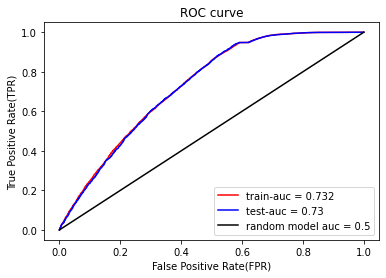

Best AUC for the model is 0.73 


In [14]:
clf = MultinomialNB(alpha=0.0001,class_prior=[0.5,0.5])
clf.fit(X_train_vec,y_train)

#predicted value of y probabilities
y_pred_train = clf.predict_proba(X_train_vec)
y_pred_test = clf.predict_proba(X_test_vec)

#predicted values of Y labels
pred_label_train = clf.predict(X_train_vec)
pred_label_test = clf.predict(X_test_vec)

#Confusion Matrix
cf_matrix_train = confusion_matrix(y_train,pred_label_train)
cf_matrix_test = confusion_matrix(y_test,pred_label_test)

fpr_train,tpr_train,threshold_train = roc_curve(y_train,y_pred_train[:,1])
fpr_test,tpr_test,threshold_test = roc_curve(y_test,y_pred_test[:,1])

train_auc = round(auc(fpr_train,tpr_train),3)
test_auc = round(auc(fpr_test,tpr_test),3)

plt.plot(fpr_train,tpr_train,color='red',label='train-auc = '+str(train_auc))
plt.plot(fpr_test,tpr_test,color='blue',label='test-auc = '+str(test_auc))
plt.plot(np.array([0,1]),np.array([0,1]),color='black',label='random model auc = '+str(0.5))
plt.xlabel('False Positive Rate(FPR)')
plt.ylabel('True Positive Rate(TPR)')
plt.title('ROC curve')
plt.legend()
plt.show()
print('Best AUC for the model is {} '.format(test_auc))

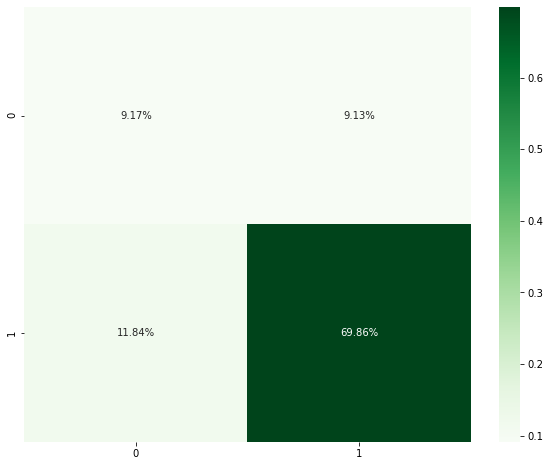

In [15]:
#plot confusion matrix
plt.figure(figsize=(10,8))
sns.heatmap(cf_matrix_train/np.sum(cf_matrix_train), annot=True,fmt='.2%', cmap='Greens')
plt.show()

In [16]:
#f1 score
print('Train F1_score for this model is : ',round(f1_score(y_train,pred_label_train),4))
print('Test F1_score for this model is : ',round(f1_score(y_test,pred_label_test),4))

Train F1_score for this model is :  0.8695
Test F1_score for this model is :  0.869


In [17]:
print('Train Accuracy score for this model : ',round(accuracy_score(y_train,pred_label_train),4))
print('Test Accuracy score for this model : ',round(accuracy_score(y_test,pred_label_test),4))

Train Accuracy score for this model :  0.7903
Test Accuracy score for this model :  0.7896


In [18]:
print(classification_report(y_test,pred_label_test))

              precision    recall  f1-score   support

           0       0.43      0.50      0.47      6353
           1       0.88      0.85      0.87     28366

    accuracy                           0.79     34719
   macro avg       0.66      0.68      0.67     34719
weighted avg       0.80      0.79      0.80     34719



* Confusion Matrix is a 2X2 matrix denoting the right and wrong prediction, which will help us analyse the rate of success.
* Precision tells how many correctly predicted values are actually positive.
* Recall describes how many positive cases our model predicts.
* F1 Score tries to capture both precision and recall in single picture.

# Observations


1)Our main performane metric is f1 score as f1 score is a measure of a model’s accuracy on a dataset.Train and test  f1 score is nearly 87% and the AUC score for the test data is 0.73...

2)As per the research done the dataset is highly imbalanced, though we have tried to balance it manually, as it is very huge dataset we have tried our best to balance it enough.

3)That is the reason we have to consider AUC score and f1 score as performace metric

4) Misclassification of False postive is more in case of naive bayes

# Logistic Regression

# Hyper parameter Tuning

In [19]:
#we have used max_iter 1000 as it was causing exception while fitting
Logi = LogisticRegression(max_iter=1000,solver='lbfgs')

param = {'C': [0.0001,0.001,0.01,0.1,1,10,20,30]}

#for the bow based model
LR = GridSearchCV(Logi,param,cv=3,refit=False,return_train_score=True,scoring='roc_auc')
LR.fit(X_train_vec,y_train)

GridSearchCV(cv=3, estimator=LogisticRegression(max_iter=1000),
             param_grid={'C': [0.0001, 0.001, 0.01, 0.1, 1, 10, 20, 30]},
             refit=False, return_train_score=True, scoring='roc_auc')

In [20]:
LR.best_params_

{'C': 1}

In [21]:
#model
clf = LogisticRegression(C=0.1,max_iter=1000,solver='lbfgs')
clf.fit(X_train_vec,y_train)

LogisticRegression(C=0.1, max_iter=1000)

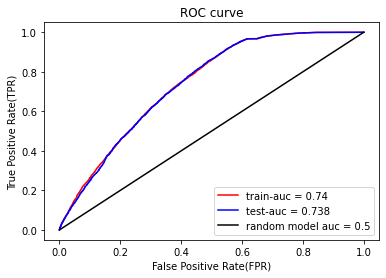

Best AUC for the model is 0.738 


In [22]:
#predicted value of y probabilities
y_pred_train = clf.predict_proba(X_train_vec)
y_pred_test = clf.predict_proba(X_test_vec)

#predicted values of Y labels
pred_label_train = clf.predict(X_train_vec)
pred_label_test = clf.predict(X_test_vec)

#Confusion Matrix
cf_matrix_train = confusion_matrix(y_train,pred_label_train)
cf_matrix_test = confusion_matrix(y_test,pred_label_test)

fpr_train,tpr_train,threshold_train = roc_curve(y_train,y_pred_train[:,1])
fpr_test,tpr_test,threshold_test = roc_curve(y_test,y_pred_test[:,1])

train_auc = round(auc(fpr_train,tpr_train),3)
test_auc = round(auc(fpr_test,tpr_test),3)

plt.plot(fpr_train,tpr_train,color='red',label='train-auc = '+str(train_auc))
plt.plot(fpr_test,tpr_test,color='blue',label='test-auc = '+str(test_auc))
plt.plot(np.array([0,1]),np.array([0,1]),color='black',label='random model auc = '+str(0.5))
plt.xlabel('False Positive Rate(FPR)')
plt.ylabel('True Positive Rate(TPR)')
plt.title('ROC curve')
plt.legend()
plt.show()
print('Best AUC for the model is {} '.format(test_auc))

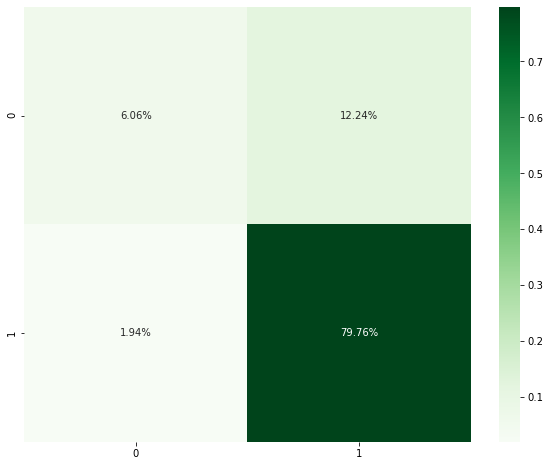

In [23]:
#plot confusion matrix
plt.figure(figsize=(10,8))
sns.heatmap(cf_matrix_train/np.sum(cf_matrix_train), annot=True,fmt='.2%', cmap='Greens')
plt.show()


In [24]:
#f1 score
print('Train F1_score for this model is : ',round(f1_score(y_train,pred_label_train),4))
print('Test F1_score for this model is : ',round(f1_score(y_test,pred_label_test),4))

Train F1_score for this model is :  0.9184
Test F1_score for this model is :  0.9178


In [25]:
print('Train Accuracy score for this model : ',round(accuracy_score(y_train,pred_label_train),4))
print('Test Accuracy score for this model : ',round(accuracy_score(y_test,pred_label_test),4))

Train Accuracy score for this model :  0.8582
Test Accuracy score for this model :  0.8574


In [26]:
print(classification_report(y_test,pred_label_test))

              precision    recall  f1-score   support

           0       0.75      0.33      0.46      6353
           1       0.87      0.98      0.92     28366

    accuracy                           0.86     34719
   macro avg       0.81      0.65      0.69     34719
weighted avg       0.85      0.86      0.83     34719



# Observations

   1)Logistic regression performs considerably better than Naive bayes in        t terms of f1 score, however AUC score being almost the same.
   
   2)There was even issue related to precision in naive bayes it seems            resolved using logistic regression model.
   
   3)Misclassification of False positive reduced to 1.94% , which resulted         in   increase of f1 score of 92%.
   
   4)Accuracy is similar that signifies that model doesnt overfit.

...->_<

# Decision Tree

# Hyper Parmater tuning

In [27]:
#model initialize
DT = DecisionTreeClassifier(class_weight='balanced')

#hyper parameters
param = {'max_depth':  [1, 5,10,15,20], 'min_samples_split': [5, 10, 100, 300,500,1000]}

#Grid search CV
DT = GridSearchCV(DT,param,cv=3,refit=False,return_train_score=True,scoring='roc_auc')
DT.fit(X_train_vec,y_train)

GridSearchCV(cv=3, estimator=DecisionTreeClassifier(class_weight='balanced'),
             param_grid={'max_depth': [1, 5, 10, 15, 20],
                         'min_samples_split': [5, 10, 100, 300, 500, 1000]},
             refit=False, return_train_score=True, scoring='roc_auc')

In [28]:
DT.best_params_

{'max_depth': 20, 'min_samples_split': 1000}

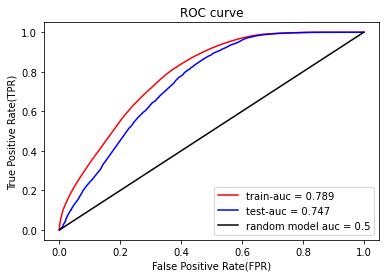

Best AUC for the model is 0.747 


In [29]:
#model
clf = DecisionTreeClassifier(class_weight='balanced',max_depth=20,min_samples_split=300)
clf.fit(X_train_vec,y_train)


#predicted value of y probabilities
y_pred_train = clf.predict_proba(X_train_vec)
y_pred_test = clf.predict_proba(X_test_vec)

#predicted values of Y labels
pred_label_train = clf.predict(X_train_vec)
pred_label_test = clf.predict(X_test_vec)

#Confusion Matrix
cf_matrix_train = confusion_matrix(y_train,pred_label_train)
cf_matrix_test = confusion_matrix(y_test,pred_label_test)

#taking the probabilit scores instead of the predicted label
#predict_proba returns probabilty scores which is in the 2nd column thus taking the second column
fpr_train,tpr_train,threshold_train = roc_curve(y_train,y_pred_train[:,1])
fpr_test,tpr_test,threshold_test = roc_curve(y_test,y_pred_test[:,1])

train_auc = round(auc(fpr_train,tpr_train),3)
test_auc = round(auc(fpr_test,tpr_test),3)

plt.plot(fpr_train,tpr_train,color='red',label='train-auc = '+str(train_auc))
plt.plot(fpr_test,tpr_test,color='blue',label='test-auc = '+str(test_auc))
plt.plot(np.array([0,1]),np.array([0,1]),color='black',label='random model auc = '+str(0.5))
plt.xlabel('False Positive Rate(FPR)')
plt.ylabel('True Positive Rate(TPR)')
plt.title('ROC curve')
plt.legend()
plt.show()
print('Best AUC for the model is {} '.format(test_auc))

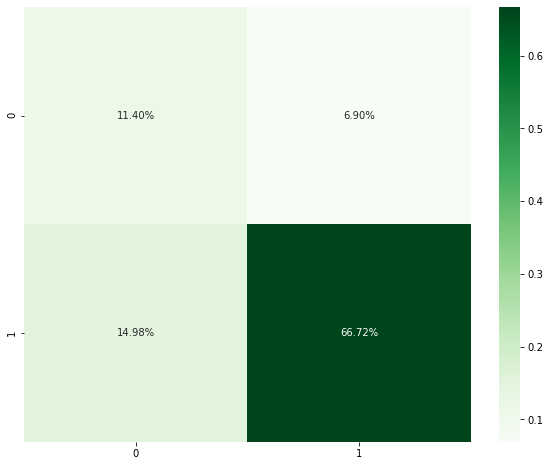

In [30]:
#plot confusion matrix
plt.figure(figsize=(10,8))
sns.heatmap(cf_matrix_train/np.sum(cf_matrix_train), annot=True,fmt='.2%', cmap='Greens')
plt.show()

In [31]:
#f1 score
print('Train F1_score for this model is : ',round(f1_score(y_train,pred_label_train),4))
print('Test F1_score for this model is : ',round(f1_score(y_test,pred_label_test),4))

Train F1_score for this model is :  0.8591
Test F1_score for this model is :  0.8498


In [32]:
print(classification_report(y_test,pred_label_test))

              precision    recall  f1-score   support

           0       0.40      0.58      0.48      6353
           1       0.90      0.81      0.85     28366

    accuracy                           0.77     34719
   macro avg       0.65      0.69      0.66     34719
weighted avg       0.81      0.77      0.78     34719



In [34]:
print('Train Accuracy score for this model : ',round(accuracy_score(y_train,pred_label_train),4))
print('Test Accuracy score for this model : ',round(accuracy_score(y_test,pred_label_test),4))

Train Accuracy score for this model :  0.7812
Test Accuracy score for this model :  0.7664


# Observations
1)Decision Tree does nothing better interms of both f1 score , auc score and accuracy as its values are 0.74 ,84%, 77%

 2)It misclassfied False Positives to a lot.

3)Model doesn't overfit but doesn't perform better either.

# Random Forest

In [35]:
param = { 'min_samples_split':[5,10,30,50,100],'max_depth':[5,7,10]}

#Random forest classifier
RFclf = RandomForestClassifier(class_weight='balanced')

#using grid search cv to tune parameters
RF = GridSearchCV(RFclf,param,cv=5,refit=False,n_jobs=-1,verbose=1,return_train_score=True,scoring='roc_auc')
RF.fit(X_train_vec,y_train)

Fitting 5 folds for each of 15 candidates, totalling 75 fits


GridSearchCV(cv=5, estimator=RandomForestClassifier(class_weight='balanced'),
             n_jobs=-1,
             param_grid={'max_depth': [5, 7, 10],
                         'min_samples_split': [5, 10, 30, 50, 100]},
             refit=False, return_train_score=True, scoring='roc_auc',
             verbose=1)

In [36]:
RF.best_params_

{'max_depth': 10, 'min_samples_split': 5}

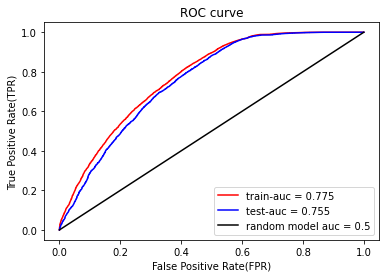

Best AUC for the model is 0.755 


In [37]:
#model
clf = RandomForestClassifier(class_weight='balanced',max_depth=10,min_samples_split=5)
clf.fit(X_train_vec,y_train)


#predicted value of y probabilities
y_pred_train = clf.predict_proba(X_train_vec)
y_pred_test = clf.predict_proba(X_test_vec)

#predicted values of Y labels
pred_label_train = clf.predict(X_train_vec)
pred_label_test = clf.predict(X_test_vec)

#Confusion Matrix
cf_matrix_train = confusion_matrix(y_train,pred_label_train)
cf_matrix_test = confusion_matrix(y_test,pred_label_test)

#taking the probabilit scores instead of the predicted label
#predict_proba returns probabilty scores which is in the 2nd column thus taking the second column
fpr_train,tpr_train,threshold_train = roc_curve(y_train,y_pred_train[:,1])
fpr_test,tpr_test,threshold_test = roc_curve(y_test,y_pred_test[:,1])

train_auc = round(auc(fpr_train,tpr_train),3)
test_auc = round(auc(fpr_test,tpr_test),3)

plt.plot(fpr_train,tpr_train,color='red',label='train-auc = '+str(train_auc))
plt.plot(fpr_test,tpr_test,color='blue',label='test-auc = '+str(test_auc))
plt.plot(np.array([0,1]),np.array([0,1]),color='black',label='random model auc = '+str(0.5))
plt.xlabel('False Positive Rate(FPR)')
plt.ylabel('True Positive Rate(TPR)')
plt.title('ROC curve')
plt.legend()
plt.show()
print('Best AUC for the model is {} '.format(test_auc))

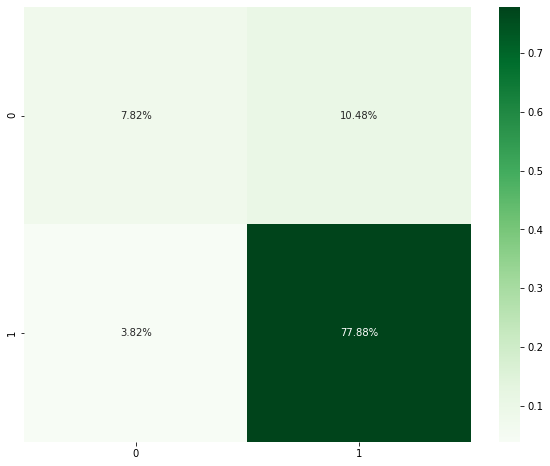

In [45]:
#plot confusion matrix
plt.figure(figsize=(10,8))
sns.heatmap(cf_matrix_train/np.sum(cf_matrix_train), annot=True,fmt='.2%', cmap='Greens')
plt.show()

In [46]:
#f1 score
print('Train F1_score for this model is : ',round(f1_score(y_train,pred_label_train),4))
print('Test F1_score for this model is : ',round(f1_score(y_test,pred_label_test),4))

Train F1_score for this model is :  0.9159
Test F1_score for this model is :  0.9142


In [47]:

print('Train Accuracy score for this model : ',round(accuracy_score(y_train,pred_label_train),4))
print('Test Accuracy score for this model : ',round(accuracy_score(y_test,pred_label_test),4))

Train Accuracy score for this model :  0.857
Test Accuracy score for this model :  0.8541


In [48]:
print(classification_report(y_test,pred_label_test))

              precision    recall  f1-score   support

           0       0.66      0.42      0.51      6353
           1       0.88      0.95      0.91     28366

    accuracy                           0.85     34719
   macro avg       0.77      0.69      0.71     34719
weighted avg       0.84      0.85      0.84     34719



# Observations

1)Random forest performs better than logistic regression in terms of f1 score and accuracy.

2)It gives an f1 score of 91.59% and doesn't seem to overfit.

3)Misclassification rate is still not that great.

4)AUC is score is 0.757.

5)Accuracy score is 85%.

# Linear SVM with hyper parameter tuning

In [51]:
from sklearn.calibration import CalibratedClassifierCV

In [100]:
from sklearn.linear_model import SGDClassifier
#SGD(Stochastic gradient descent classifier)
alpha =[10 ** x for x in range(-5,2)]
#hyperparameter for sgd
for i in alpha:
    clf = SGDClassifier(alpha=i,penalty='l2',loss='hinge',random_state=42)
    clf.fit(X_train_vec,y_train)
    sig_clf= CalibratedClassifierCV(clf, method='sigmoid')
    sig_clf.fit(X_train_vec,y_train)
    pred_label_train = sig_clf.predict(X_train_vec)
    pred_label_test = sig_clf.predict(X_test_vec)
    print('Train F1_score for this model is : ',round(f1_score(y_train,pred_label_train),4))
    print('Test F1_score for this model is : ',round(f1_score(y_test,pred_label_test),4))
    print(classification_report(y_test,pred_label_test))
    break

Train F1_score for this model is :  0.9168
Test F1_score for this model is :  0.917
              precision    recall  f1-score   support

           0       0.72      0.35      0.47      6353
           1       0.87      0.97      0.92     28366

    accuracy                           0.86     34719
   macro avg       0.80      0.66      0.69     34719
weighted avg       0.84      0.86      0.84     34719



In [91]:
from sklearn.svm import SVC

In [ ]:
svc = SVC()
svc.fit(X_train_vec,y_train)
svc.score(X_test_vec,y_test)

In [ ]:
ss=svc.predict(X_test_vec,y_test)
print(ss[0:1000])

# Observations

1)Linear SVM gives better scores with f1 score and accuracy

2)Doesnt overfit as well

3)The issue related to precision seems to act better when svm is used.

# naive bayes using hyper parameter tuning with calibration 


In [83]:
naivebayes=MultinomialNB(alpha=i,class_prior=[0.5,0.5])
naivebayes.fit(X_train_vec,y_train)
sig_clf = CalibratedClassifierCV(naivebayes, method='sigmoid')
sig_clf.fit(X_train_vec,y_train)
naive_bayes_predict_train=sig_clf.predict_proba(X_train_vec)
naive_bayes_predict_test=sig_clf.predict_proba(X_test_vec)
print('Train F1_score for this model is : ',round(f1_score(y_train,pred_label_train),4))
print('Test F1_score for this model is : ',round(f1_score(y_test,pred_label_test),4))
print(classification_report(y_test,pred_label_test))

Train F1_score for this model is :  0.9168
Test F1_score for this model is :  0.9184
              precision    recall  f1-score   support

           0       0.76      0.33      0.46      6353
           1       0.87      0.98      0.92     28366

    accuracy                           0.86     34719
   macro avg       0.81      0.65      0.69     34719
weighted avg       0.85      0.86      0.83     34719



1)Before the accuracy using naive bayes was 79% it has improved upto 86% when CalibratedclassifierCV  is used.,,

CalibratedClassifierCV uses a cross-validation approach to fit both the classifier and the regressor

F1 score was 86% currently proves to be close to 92%


# LOGISTIC REGRESSION WITH HYPERPARAMETER TUNING

In [77]:
from sklearn.linear_model import SGDClassifier
alpha=[10 **x for x in range (-5, 2)]#hyperparam for SGD classifier.

for i in alpha:
    clf=SGDClassifier(alpha=i,penalty='l2', loss='log', random_state=42)
    clf.fit(X_train_vec,y_train)
    sig_clf =CalibratedClassifierCV(clf,method="sigmoid")
    sig_clf.fit(X_train_vec,y_train)
    predict_y=sig_clf.predict_proba(X_train_vec)
    pred_label_test = sig_clf.predict(X_test_vec)
    print('Train F1_score for this model is : ',round(f1_score(y_train,pred_label_train),4))
    print('Test F1_score for this model is : ',round(f1_score(y_test,pred_label_test),4))
    print(classification_report(y_test,pred_label_test))
    break

Train F1_score for this model is :  0.9168
Test F1_score for this model is :  0.9184
              precision    recall  f1-score   support

           0       0.76      0.33      0.46      6353
           1       0.87      0.98      0.92     28366

    accuracy                           0.86     34719
   macro avg       0.81      0.65      0.69     34719
weighted avg       0.85      0.86      0.83     34719



***There is no much of difference in the perfomance metrics with SGD(Stochasitc Gradient Descent) when compared with GridSearchCV as earlier before

# Results

In [104]:
!pip install prettytable==1.0.1

from prettytable import PrettyTable

table = PrettyTable()
table.field_names = ["Model", "F1_score", " AUC_score "," Accuracy "]
table.add_row([ "Naive Bayes",'91.68','0.73','86'])
table.add_row(["Logistic Regression",'91.84','73.8','86.05'])
table.add_row(["Decision Tree",'85','74.7','77'])
table.add_row(["Random Forest",'91','75.7','85',])

print(table)


+---------------------+----------+-------------+------------+
|        Model        | F1_score |  AUC_score  |  Accuracy  |
+---------------------+----------+-------------+------------+
|     Naive Bayes     |  91.68   |     0.73    |     86     |
| Logistic Regression |  91.84   |     73.8    |   86.05    |
|    Decision Tree    |    85    |     74.7    |     77     |
|    Random Forest    |    91    |     75.7    |     85     |
+---------------------+----------+-------------+------------+


# Summary

1) Logistic regression performs better in comparision to rest of the model in terms of all the performance metric.

2) f1 score has been our primary performance metric.


In [20]:
log = LogisticRegression()
log.fit(X_train_vec,y_train)

C:\Anaconda\lib\site-packages\sklearn\linear_model\_logistic.py:763: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


LogisticRegression()

In [21]:
log.score(X_test_vec,y_test)

0.8569947291108615

In [22]:
log.score(X_test_vec,y_test)

0.8569947291108615

In [23]:
hh=log.predict(X_test_vec)
print(hh[0:1000])

[1 1 1 1 1 1 1 1 1 0 1 1 1 1 0 1 0 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1
 1 1 1 1 1 1 1 1 1 0 1 1 1 1 1 0 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1
 1 1 0 1 1 1 1 1 1 1 1 1 1 1 1 1 0 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1
 1 1 1 1 1 1 1 1 0 1 1 1 1 1 1 1 1 1 1 1 1 0 1 1 1 0 1 1 1 1 1 1 1 1 0 1 1
 1 1 0 1 1 1 0 1 1 1 1 1 1 1 1 1 0 1 1 1 1 1 0 1 1 0 1 1 1 1 1 1 1 1 1 1 1
 1 1 0 1 0 1 1 1 1 1 1 1 1 1 1 1 0 1 1 1 1 1 1 1 0 1 1 1 1 1 1 1 1 1 1 1 1
 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 0 1 1 1
 1 0 1 1 1 1 1 0 1 1 1 1 1 1 1 1 1 1 1 1 1 1 0 1 1 1 1 1 1 1 1 1 1 1 1 1 1
 1 1 1 1 1 1 1 1 1 1 1 1 0 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 0 1 1 1 1
 1 1 1 1 1 1 0 0 1 1 1 1 1 1 1 1 0 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1
 1 1 0 0 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 0 1 1 1 1 1 1 1 1 1
 1 0 1 1 1 1 0 1 1 0 1 1 1 1 1 1 1 0 0 1 1 1 1 1 1 1 1 1 0 1 1 1 1 1 1 1 1
 1 1 1 1 0 0 1 1 1 1 0 1 1 1 1 1 0 1 1 1 1 1 1 1 1 1 1 1 0 1 1 0 1 1 1 1 1
 1 1 1 1 1 1 1 1 1 1 1 1 

# These are the predicted score for the first thousand unseen test data